In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from datetime import datetime

In [2]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv')

train_labels = pd.read_csv('dengue_labels_train.csv')

In [3]:
train_features.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
# Seperate data for San Juan
sj_train_features = train_features[train_features['city']=='sj']
sj_train_labels = train_labels[train_features['city']=='sj']

# Separate data for Iquitos
iq_train_features = train_features[train_features['city']=='iq']
iq_train_labels = train_labels[train_features['city']=='iq']

In [5]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 24)
labels  :  (936, 4)

Iquitos
features:  (520, 24)
labels  :  (520, 4)


In [6]:
sj_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
sj = pd.DataFrame()
sj['week_start_date'] = sj_train_features['week_start_date']
sj['total_cases'] = sj_train_labels['total_cases']
sj['week_start_date'] = pd.to_datetime(sj['week_start_date'], infer_datetime_format=True)
sj.set_index('week_start_date', inplace=True)

iq = pd.DataFrame()
iq['week_start_date'] = iq_train_features['week_start_date']
iq['total_cases'] = iq_train_labels['total_cases']
iq['week_start_date'] = pd.to_datetime(iq['week_start_date'], infer_datetime_format=True)
iq.set_index('week_start_date', inplace=True)

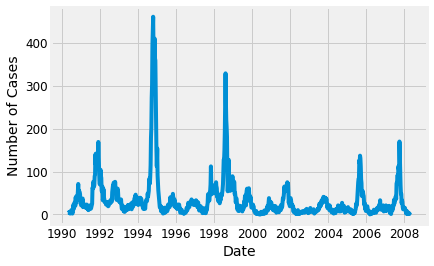

In [8]:
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.plot(sj)

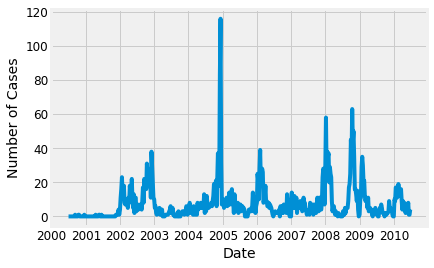

In [9]:
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.plot(iq)

In [10]:
y_sj = sj['total_cases'].resample('MS').mean()
y_sj

y_iq = iq['total_cases'].resample('MS').mean()
y_iq

week_start_date
2000-07-01     0.00
2000-08-01     0.00
2000-09-01     0.20
2000-10-01     0.50
2000-11-01     0.00
2000-12-01     0.25
2001-01-01     0.00
2001-02-01     0.00
2001-03-01     0.00
2001-04-01     0.20
2001-05-01     0.50
2001-06-01     0.25
2001-07-01     0.00
2001-08-01     0.00
2001-09-01     0.00
2001-10-01     0.00
2001-11-01     0.50
2001-12-01     2.00
2002-01-01    13.20
2002-02-01    11.75
2002-03-01     8.00
2002-04-01    11.80
2002-05-01    12.50
2002-06-01     6.75
2002-07-01     5.80
2002-08-01     6.75
2002-09-01    16.25
2002-10-01    24.20
2002-11-01    20.50
2002-12-01    24.75
              ...  
2008-01-01    37.20
2008-02-01    27.75
2008-03-01    10.25
2008-04-01     2.80
2008-05-01     1.00
2008-06-01     0.50
2008-07-01     2.40
2008-08-01     4.25
2008-09-01    23.00
2008-10-01    47.75
2008-11-01    20.00
2008-12-01     7.00
2009-01-01    17.20
2009-02-01    20.75
2009-03-01     8.50
2009-04-01     5.60
2009-05-01     1.75
2009-06-01     3.25
2009

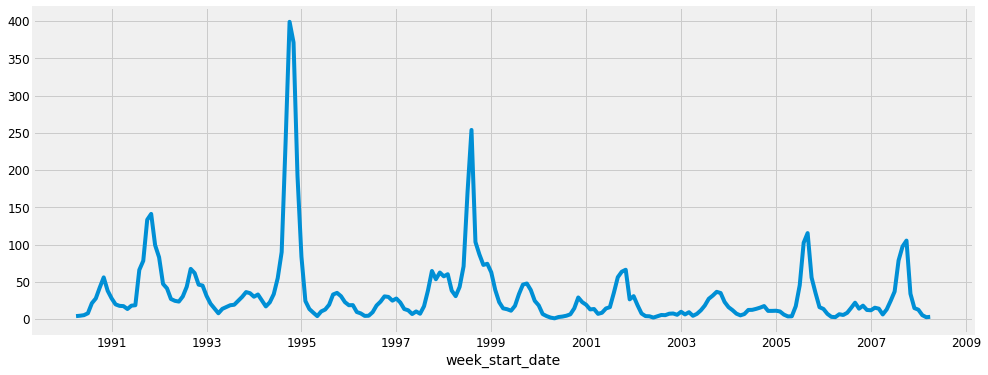

In [11]:
y_sj.plot(figsize=(15, 6))
plt.show()

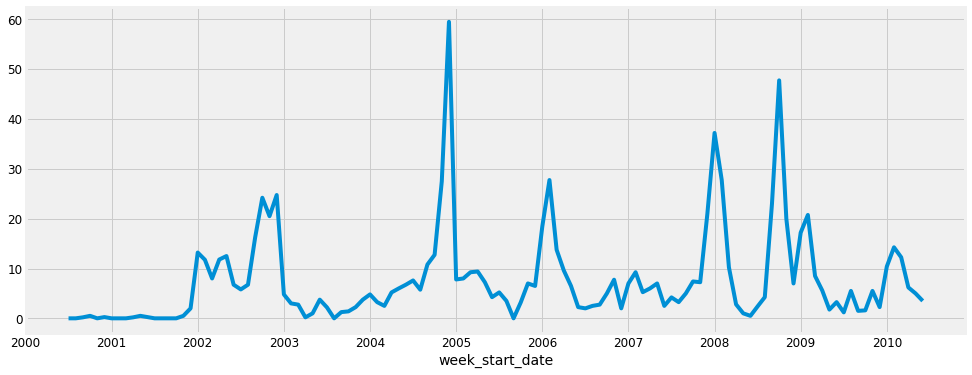

In [12]:
y_iq.plot(figsize=(15, 6))
plt.show()

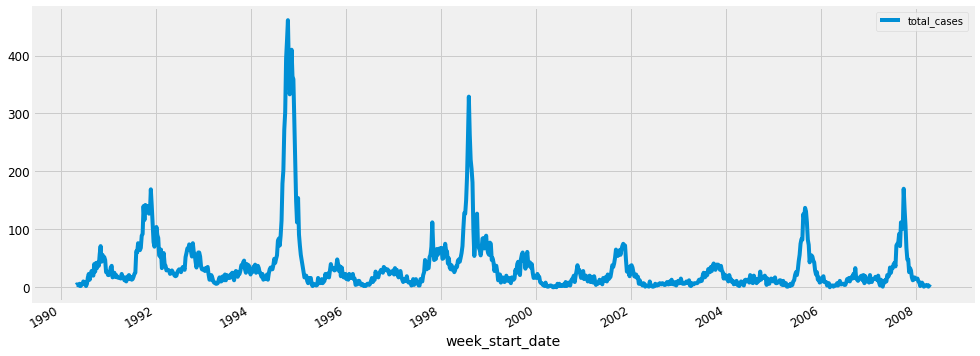

In [13]:
sj.plot(figsize=(15, 6))
plt.show()

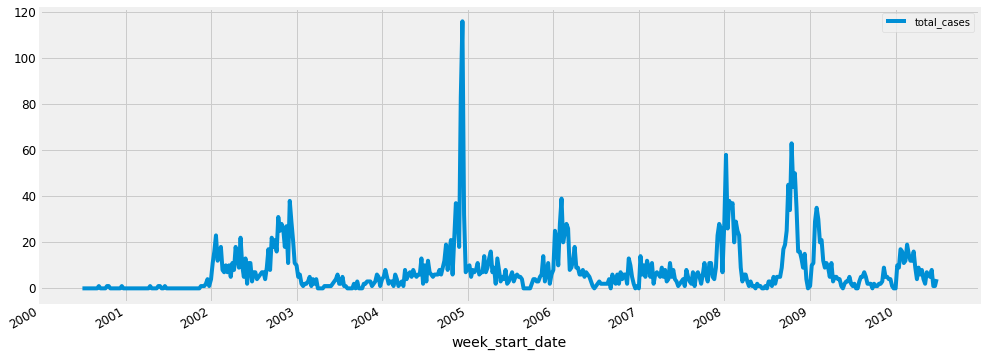

In [14]:
iq.plot(figsize=(15, 6))
plt.show()

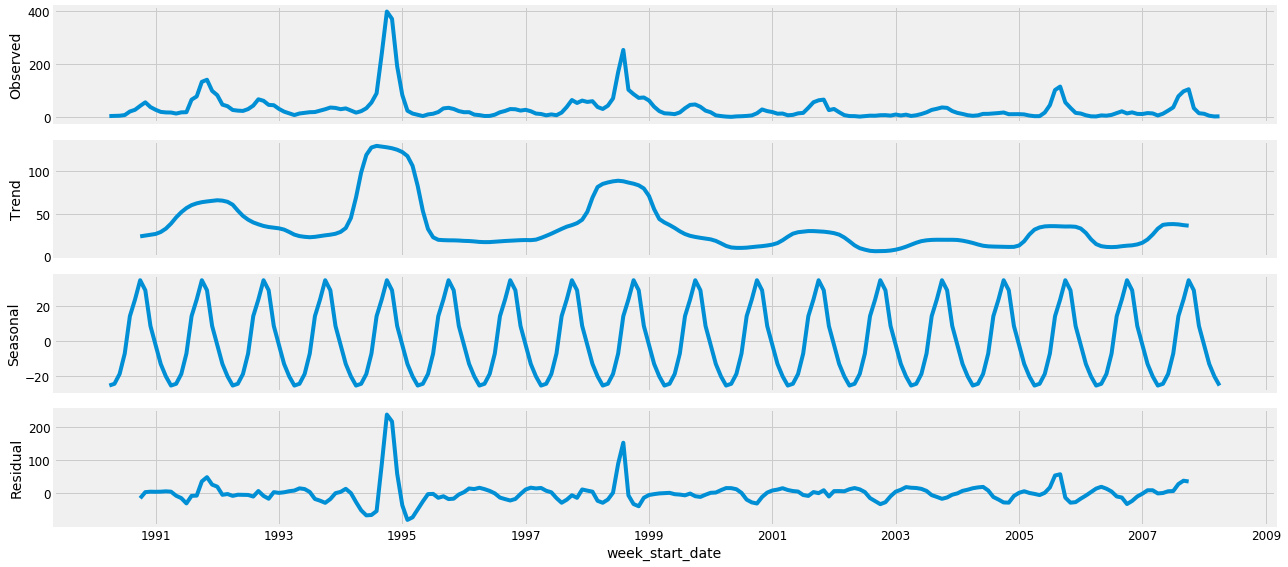

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_sj, model='additive')
fig = decomposition.plot()
plt.show()

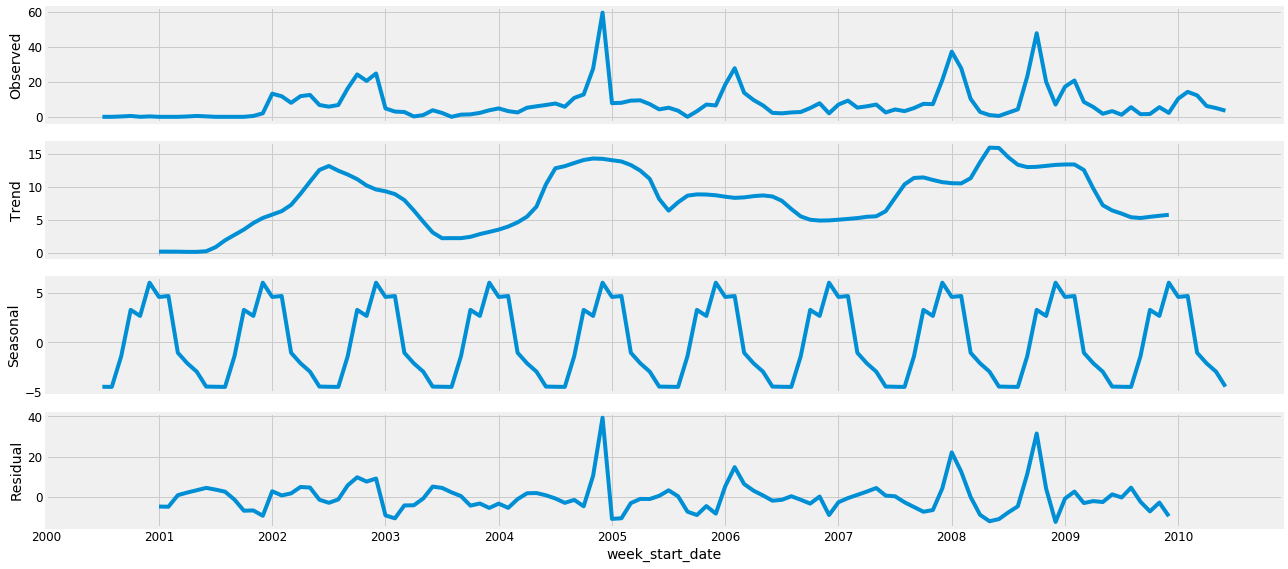

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_iq, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_sj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2385.696182357608
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2249.422156718205
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2313.4924239362326
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2055.8897114085376
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2247.9694136478593
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2162.044164590994
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2132.779277336063
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2057.6396173255844
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2161.4619767384984
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2038.6707964359773
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2109.3017144497235
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1876.4024480488486
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2049.0771785502234
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1974.5498975838182
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1957.410318134826
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1878.3602118160961
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2055.2358152414367
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1952.44551464460

In [19]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_iq,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:933.5665702926557
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:843.2567431614563
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:869.3849726819581
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:720.9094122006112
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:841.524391237845
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:810.3771557690651
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:737.7981068256964
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:716.8007107384149
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:858.6002789476328
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:781.1237042730996
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:822.6233155744791
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:681.9809503282565
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:790.6357105114845
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:766.9179427701528
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:706.0016376470799
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:682.0390643067489
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:844.5778342836535
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:772.161642038251
ARIMA(0, 1, 

C:\Users\Yasiru Randeepa\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:689.9726070830819
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:766.2012267259788
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:768.1019483995495
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:697.6950896874803
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:692.2488687485122
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:832.4355717642429
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:761.645607695066
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:820.5985928949833
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:682.0716754817832
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:767.684023962777
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:763.3696163632536
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:697.9257866338456
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:683.4397664204638
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:845.7487811342967
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:773.4175657601135
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:847.4358792993427
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:707.3574790841228
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:773.379378806482
ARIMA(1, 1, 0

In [20]:
mod_sj = sm.tsa.statespace.SARIMAX(y_sj,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sj = mod_sj.fit()
print(results_sj.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0287      0.103      0.279      0.780      -0.173       0.230
ma.L1          0.4510      0.111      4.048      0.000       0.233       0.669
ar.S.L12      -0.0013      0.095     -0.014      0.989      -0.187       0.184
ma.S.L12      -1.0000      0.045    -22.186      0.000      -1.088      -0.912
sigma2       628.0138   7.18e-05   8.75e+06      0.000     628.014     628.014


In [21]:
mod_iq = sm.tsa.statespace.SARIMAX(y_iq,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_iq = mod_iq.fit()
print(results_iq.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4969      0.076      6.520      0.000       0.348       0.646
ma.L1         -1.0000   1250.988     -0.001      0.999   -2452.890    2450.890
ar.S.L12      -0.3440      0.104     -3.318      0.001      -0.547      -0.141
ma.S.L12      -0.6184      0.123     -5.038      0.000      -0.859      -0.378
sigma2        74.9468   9.38e+04      0.001      0.999   -1.84e+05    1.84e+05


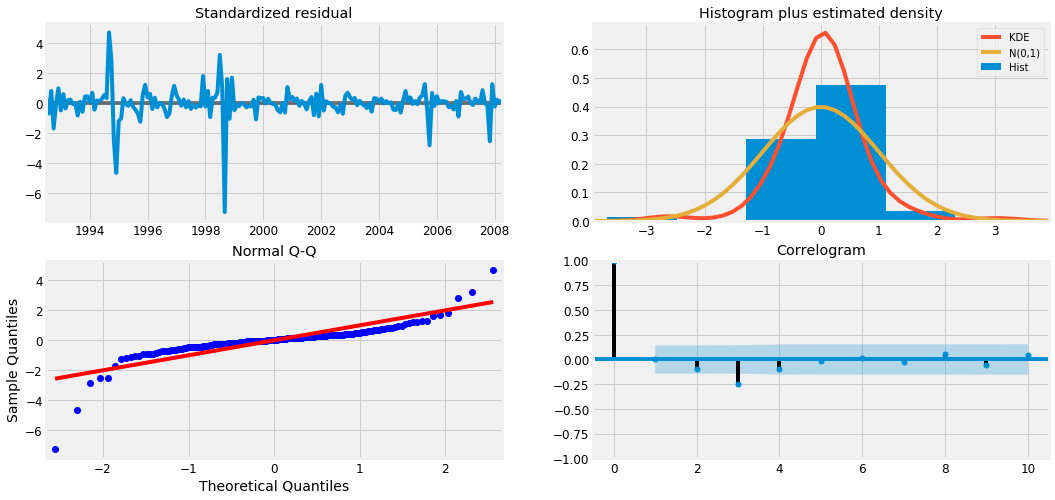

In [22]:
results_sj.plot_diagnostics(figsize=(16, 8))
plt.show()

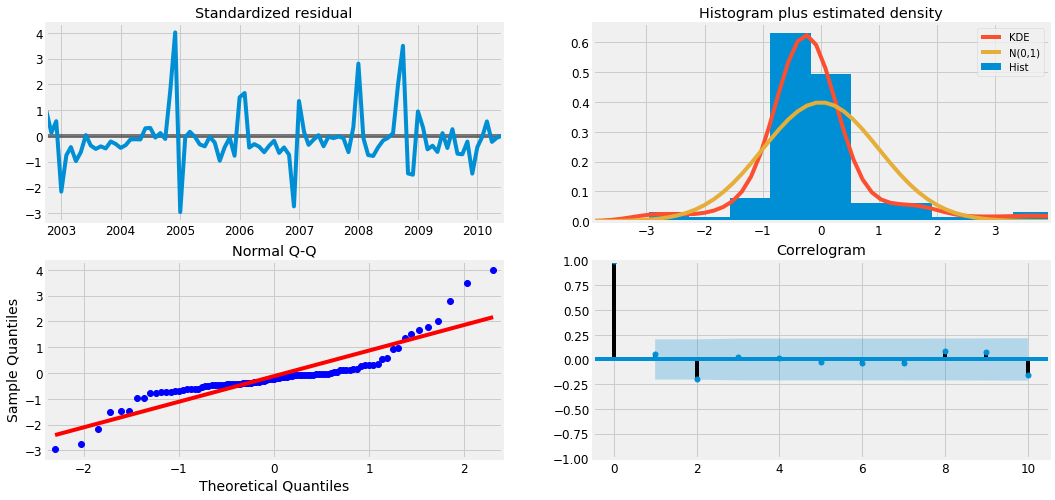

In [23]:
results_iq.plot_diagnostics(figsize=(16, 8))
plt.show()

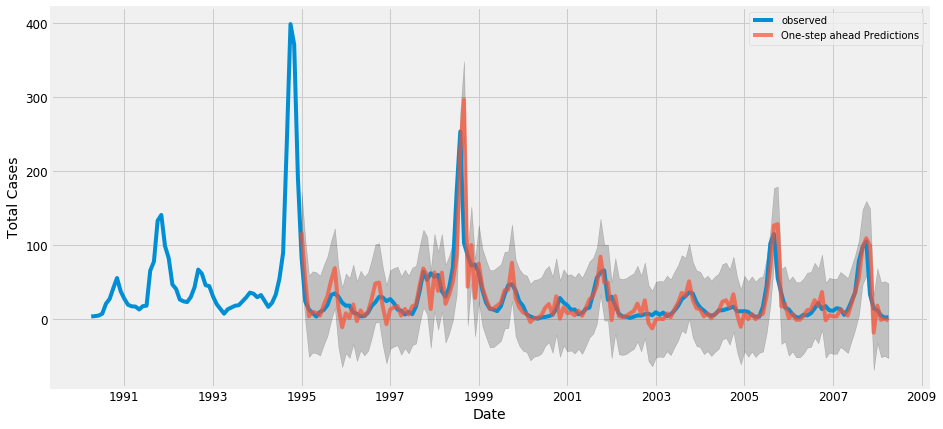

In [24]:
pred = results_sj.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_sj['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Predictions', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y_sj['2001-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 235.13


In [26]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 15.33


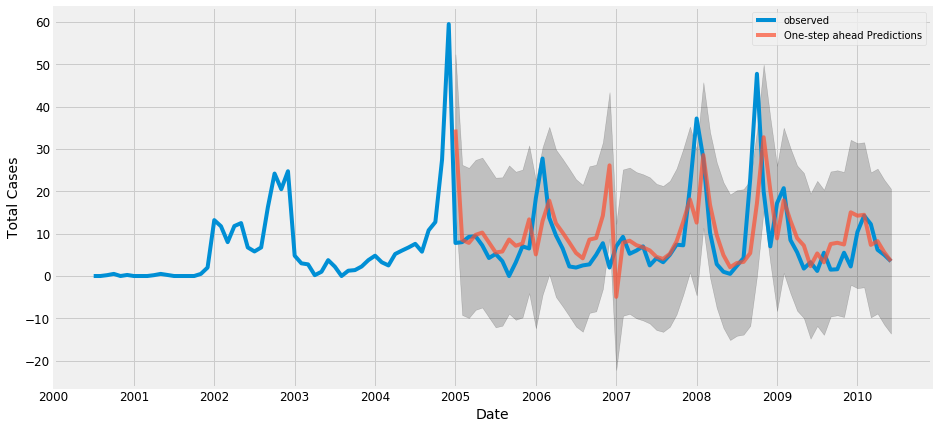

In [27]:
pred = results_iq.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_iq['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Predictions', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Cases')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y_iq['2001-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 75.68


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 8.7


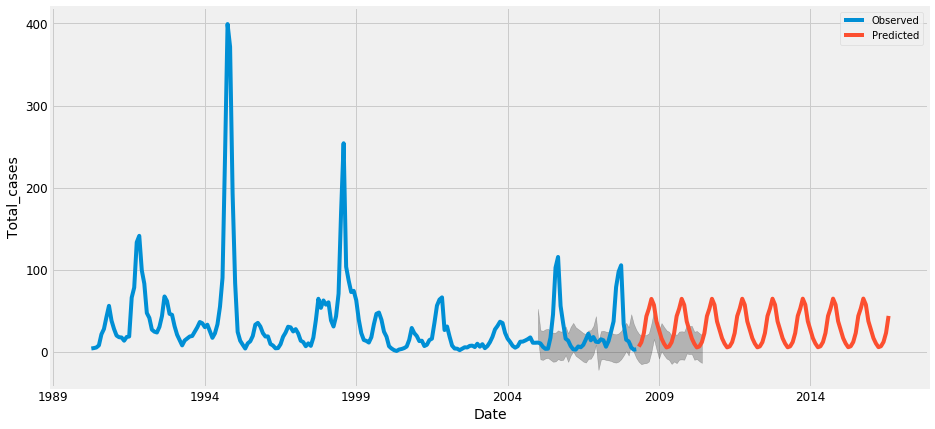

5
12


,index,0
0,2008-05-01 00:00:00,6
1,2008-06-01 00:00:00,12
2,2008-07-01 00:00:00,23
3,2008-08-01 00:00:00,43
4,2008-09-01 00:00:00,52
5,2008-10-01 00:00:00,64
6,2008-11-01 00:00:00,57
7,2008-12-01 00:00:00,37
8,2009-01-01 00:00:00,27
9,2009-02-01 00:00:00,16


In [30]:
pred_uc_sj = results_sj.get_forecast(steps=100)
pred_ci_sj = pred_uc_sj.conf_int()
pred_fu_sj = pred_uc_sj.predicted_mean.round(0).astype(int)
#print(pred_fu)
ax = y_sj.plot(label='Observed', figsize=(14, 7))
pred_uc_sj.predicted_mean.plot(ax=ax, label='Predicted')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_cases')
plt.legend()
plt.show()
pred_sj_dataFrame = pd.DataFrame(pred_fu_sj)
pred_sj_dataFrame = pred_sj_dataFrame.reset_index()
pred_sj_dataFrame['index'] = pred_sj_dataFrame['index'].apply(lambda x: str(x))
print (pred_sj_dataFrame['index'][0][6])
print (pred_sj_dataFrame.iloc[1][0])
pred_sj_dataFrame

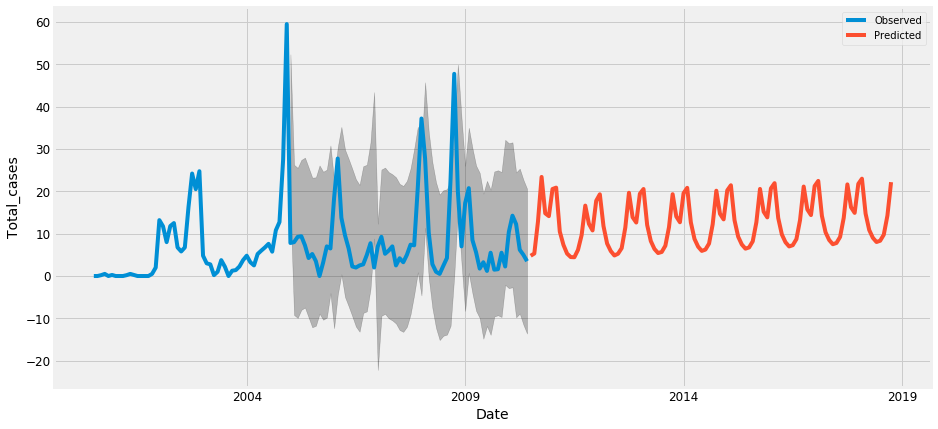

7
5


,index,0
0,2010-07-01 00:00:00,5
1,2010-08-01 00:00:00,5
2,2010-09-01 00:00:00,13
3,2010-10-01 00:00:00,23
4,2010-11-01 00:00:00,15
5,2010-12-01 00:00:00,14
6,2011-01-01 00:00:00,21
7,2011-02-01 00:00:00,21
8,2011-03-01 00:00:00,10
9,2011-04-01 00:00:00,7


In [31]:
pred_uc_iq = results_iq.get_forecast(steps=100)
pred_ci_iq = pred_uc_iq.conf_int()
pred_fu_iq = pred_uc_iq.predicted_mean.round(0).astype(int)
#print(pred_fu)
ax = y_iq.plot(label='Observed', figsize=(14, 7))
pred_uc_iq.predicted_mean.plot(ax=ax, label='Predicted')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_cases')
plt.legend()
plt.show()
pred_iq_dataFrame = pd.DataFrame(pred_fu_iq)
pred_iq_dataFrame = pred_iq_dataFrame.reset_index()
pred_iq_dataFrame['index'] = pred_iq_dataFrame['index'].apply(lambda x: str(x))
print (pred_iq_dataFrame['index'][0][6])
print (pred_iq_dataFrame.iloc[1][0])
pred_iq_dataFrame

In [32]:
city_test_csv = pd.read_csv('dengue_features_test.csv')
submission_csv = pd.read_csv('submission_format.csv')

sj_test_features = city_test_csv[city_test_csv['city']=='sj']
sj_test_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
255,sj,2013,13,2013-03-26,-0.08740,-0.016183,0.156343,0.105186,30.34,298.670000,...,2.55,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5
256,sj,2013,14,2013-04-02,-0.20325,-0.077833,0.204171,0.178914,6.55,298.035714,...,64.30,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6
257,sj,2013,15,2013-04-09,-0.11760,-0.008200,0.192700,0.170429,0.00,299.057143,...,0.70,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4
258,sj,2013,16,2013-04-16,0.08275,0.031200,0.135014,0.074857,0.00,298.912857,...,1.40,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9
259,sj,2013,17,2013-04-23,-0.08730,-0.048667,0.129814,0.117671,45.47,298.067143,...,19.90,79.045714,45.47,15.451429,2.342857,26.442857,6.742857,31.1,21.7,47.5


In [33]:
iq_test_csv = pd.read_csv('dengue_features_test.csv')

iq_test_features = city_test_csv[city_test_csv['city']=='iq']
iq_test_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1
415,iq,2013,26,2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,...,27.80,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9


In [34]:
sj_pred = pd.DataFrame()
sj_pred['week_start_date'] = sj_test_features['week_start_date']
sj_pred['total_cases'] = submission_csv['total_cases']
sj_pred.head(10)

,week_start_date,total_cases
0,2008-04-29,6
1,2008-05-06,6
2,2008-05-13,6
3,2008-05-20,6
4,2008-05-27,6
5,2008-06-03,12
6,2008-06-10,12
7,2008-06-17,12
8,2008-06-24,12
9,2008-07-01,23


In [35]:
iq_pred = pd.DataFrame()
iq_pred['week_start_date'] = iq_test_features['week_start_date']
iq_pred['total_cases'] = submission_csv['total_cases']
iq_pred.tail(10)

,week_start_date,total_cases
406,2013-04-23,11
407,2013-04-30,11
408,2013-05-07,10
409,2013-05-14,10
410,2013-05-21,10
411,2013-05-28,10
412,2013-06-04,8
413,2013-06-11,8
414,2013-06-18,8
415,2013-06-25,8


In [36]:
a = sj_pred.iloc[0]['week_start_date']
a[6]
#print (pred_dataFrame['index'][0][6])

'4'

In [37]:
sj_pred.iloc[0,1] = 6
sj_pred.iloc[0]['total_cases']

6

In [38]:
pred_iq_dataFrame

,index,0
0,2010-07-01 00:00:00,5
1,2010-08-01 00:00:00,5
2,2010-09-01 00:00:00,13
3,2010-10-01 00:00:00,23
4,2010-11-01 00:00:00,15
5,2010-12-01 00:00:00,14
6,2011-01-01 00:00:00,21
7,2011-02-01 00:00:00,21
8,2011-03-01 00:00:00,10
9,2011-04-01 00:00:00,7


In [39]:
count = 0
for i in range(1,260):
    m1 = sj_pred.iloc[i]['week_start_date'][6]
    m2 = pred_sj_dataFrame['index'][count][6]
    if(m1==m2):
        sj_pred.iloc[i,1] = pred_sj_dataFrame.iloc[count][0]
    else:
        count+=1
        sj_pred.iloc[i,1] = pred_sj_dataFrame.iloc[count][0]
print (sj_pred['total_cases'])

0       6
1       6
2       6
3       6
4       6
5      12
6      12
7      12
8      12
9      23
10     23
11     23
12     23
13     23
14     43
15     43
16     43
17     43
18     52
19     52
20     52
21     52
22     52
23     64
24     64
25     64
26     64
27     57
28     57
29     57
       ..
230    53
231    65
232    65
233    65
234    65
235    57
236    57
237    57
238    57
239    37
240    37
241    37
242    37
243    27
244    27
245    27
246    27
247    27
248    17
249    17
250    17
251    17
252    10
253    10
254    10
255    10
256     5
257     5
258     5
259     5
Name: total_cases, Length: 260, dtype: int64


In [40]:
pred_iq_dataFrame

,index,0
0,2010-07-01 00:00:00,5
1,2010-08-01 00:00:00,5
2,2010-09-01 00:00:00,13
3,2010-10-01 00:00:00,23
4,2010-11-01 00:00:00,15
5,2010-12-01 00:00:00,14
6,2011-01-01 00:00:00,21
7,2011-02-01 00:00:00,21
8,2011-03-01 00:00:00,10
9,2011-04-01 00:00:00,7


In [41]:
count = 0
for i in range(0,156):
    m1 = iq_pred.iloc[i]['week_start_date'][6]
    m2 = pred_iq_dataFrame['index'][count][6]
    if(m1==m2):
        iq_pred.iloc[i,1] = pred_iq_dataFrame.iloc[count][0]
    else:
        count+=1
        iq_pred.iloc[i,1] = pred_iq_dataFrame.iloc[count][0]
print (iq_pred['total_cases'])

260     5
261     5
262     5
263     5
264     5
265     5
266     5
267     5
268     5
269    13
270    13
271    13
272    13
273    23
274    23
275    23
276    23
277    23
278    15
279    15
280    15
281    15
282    14
283    14
284    14
285    14
286    21
287    21
288    21
289    21
       ..
386    13
387    13
388    13
389    13
390    19
391    19
392    19
393    19
394    19
395    21
396    21
397    21
398    21
399    12
400    12
401    12
402    12
403     8
404     8
405     8
406     8
407     8
408     6
409     6
410     6
411     6
412     5
413     5
414     5
415     5
Name: total_cases, Length: 156, dtype: int64


In [42]:
sj_pred.to_csv('sj.csv')
iq_pred.to_csv('iq.csv')